In [124]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data_to_load = pd.read_csv("city_data.csv")
city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [125]:
ride_data_to_load = pd.read_csv("ride_data.csv")
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [126]:
# aggregate the ride_data (reasons: cities are repeated here, calculate average fare and ride numbers)
ride_data_by_city = ride_data_to_load.groupby(["city"], as_index=False).agg({'fare': 'mean', 'ride_id': 'count'})
ride_data_by_city.head()

,city,fare,ride_id
0,Amandaburgh,24.641667,18
1,Barajasview,25.332273,22
2,Barronchester,36.422500,16
3,Bethanyland,32.956111,18
4,Bradshawfurt,40.064000,10


In [127]:
# Rename the dataframe
ride_data_by_city = ride_data_by_city.rename(columns={'fare': 'Average Fare', 'ride_id': 'Number of Rides'})
ride_data_by_city.head()

,city,Average Fare,Number of Rides
0,Amandaburgh,24.641667,18
1,Barajasview,25.332273,22
2,Barronchester,36.422500,16
3,Bethanyland,32.956111,18
4,Bradshawfurt,40.064000,10


In [128]:
# Combine the above data and ride_data into a single dataset
combined_city_ride = pd.merge(ride_data_by_city, city_data_to_load, how='outer', on='city')

# Display the data table for preview
combined_city_ride.head()

,city,Average Fare,Number of Rides,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [129]:
# preparing dataset for bubble graph using scatter plot
# Define the mapping of city type to color name
city_type_color = {'Urban': 'LightCoral', 'Suburban': 'LightSkyBlue', 'Rural': 'Gold'}

# Add a new column to the dataframe with the bubble color
combined_city_ride['bubble_color'] = combined_city_ride.apply(lambda x: city_type_color[x['type']], axis = 1)
combined_city_ride.head()

,city,Average Fare,Number of Rides,driver_count,type,bubble_color
0,Amandaburgh,24.641667,18,12,Urban,LightCoral
1,Barajasview,25.332273,22,26,Urban,LightCoral
2,Barronchester,36.422500,16,11,Suburban,LightSkyBlue
3,Bethanyland,32.956111,18,22,Suburban,LightSkyBlue
4,Bradshawfurt,40.064000,10,7,Rural,Gold


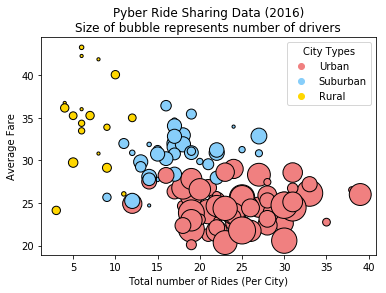

In [146]:
# Build the scatter plots for each city types
plt.scatter(combined_city_ride['Number of Rides'], combined_city_ride['Average Fare'], 
            combined_city_ride['driver_count'] * 10, c = combined_city_ride['bubble_color'], edgecolors="black")

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)\nSize of bubble represents number of drivers")
plt.xlabel("Total number of Rides (Per City)")
plt.ylabel("Average Fare")

# Create a legend.  The following 2 lines generate custom fake lines that are used as legend entries:
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in city_type_color.values()]
plt.legend(markers, city_type_color.keys(), numpoints=1, title="City Types")

plt.show()
# Save figure
plt.savefig("BubblePlotRideSharing.png")

In [131]:
ride_data_sum = ride_data_to_load.groupby(["city"], as_index=False).agg({'fare': 'sum'})
ride_data_sum = ride_data_sum.rename(columns={'fare': 'Total Fares'})

# Combine the data into a single dataset
combined_city_sum = pd.merge(ride_data_sum, combined_city_ride, how='outer', on='city')

# Display the data table for preview
combined_city_sum.head()

,city,Total Fares,Average Fare,Number of Rides,driver_count,type,bubble_color
0,Amandaburgh,443.55,24.641667,18,12,Urban,LightCoral
1,Barajasview,557.31,25.332273,22,26,Urban,LightCoral
2,Barronchester,582.76,36.422500,16,11,Suburban,LightSkyBlue
3,Bethanyland,593.21,32.956111,18,22,Suburban,LightSkyBlue
4,Bradshawfurt,400.64,40.064000,10,7,Rural,Gold


In [132]:
type_summary = combined_city_sum.groupby(["type"], as_index=False).agg({'Total Fares': 'sum'})
type_summary.head()

,type,Total Fares
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [133]:
# Add a new column to the dataframe with the bubble color
type_summary['slice_color'] = type_summary.apply(lambda x: city_type_color[x['type']], axis = 1)

# Labels for the sections of our pie chart
labels = type_summary['type']

# The colors of each section of the pie chart
colors = type_summary['slice_color']

# each section of the pie chart
sizes = type_summary['Total Fares']

# Tells matplotlib to separate one section from the others
explode = (0, 0, 0.1) 

Text(0.5,1,'% of Total Fares by City Type')

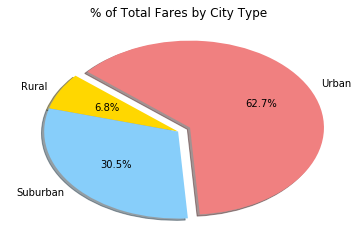

In [134]:
plt.pie(sizes,labels=labels, explode = explode, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

In [135]:
# Save figure
plt.savefig("FaresPie.png")

In [136]:
# % of Total Rides by City Type
type_summary = combined_city_sum.groupby(["type"], as_index=False).agg({'Number of Rides': 'sum'})
type_summary.head()

,type,Number of Rides
0,Rural,125
1,Suburban,625
2,Urban,1625


In [137]:
# Add a new column to the dataframe with the bubble color
type_summary['slice_color'] = type_summary.apply(lambda x: city_type_color[x['type']], axis = 1)

# Labels for the sections of our pie chart
labels = type_summary['type']

# The colors of each section of the pie chart
colors = type_summary['slice_color']

# each section of the pie chart
sizes = type_summary['Number of Rides']

# Tells matplotlib to separate one section from the others
explode = (0, 0, 0.1) 

Text(0.5,1,'% of Total Rides by City Type')

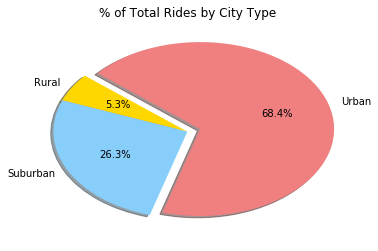

In [138]:
plt.pie(sizes,labels=labels, explode = explode, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

In [139]:
# Save figure
plt.savefig("RidesPie.png")

In [140]:
# % of Total Drivers by City Type
type_summary = combined_city_sum.groupby(["type"], as_index=False).agg({'driver_count': 'sum'})
type_summary.head()

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


In [141]:
# Add a new column to the dataframe with the bubble color
type_summary['slice_color'] = type_summary.apply(lambda x: city_type_color[x['type']], axis = 1)

# Labels for the sections of our pie chart
labels = type_summary['type']

# The colors of each section of the pie chart
colors = type_summary['slice_color']

# each section of the pie chart
sizes = type_summary['driver_count']

# Tells matplotlib to separate one section from the others
explode = (0, 0, 0.1) 

Text(0.5,1,'% of Total Drivers by City Type')

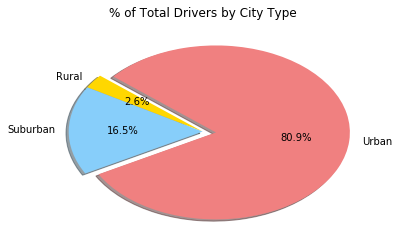

In [142]:
plt.pie(sizes,labels=labels, explode = explode, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

In [143]:
# Save figure
plt.savefig("DriversPie.png")

In [144]:
#  Include a written description of three observable trends based on the data:

# The Bubble plot is very clear in what the relationship is between average fare between city types.
# Urban has much more rides than Suburban and Rural but average fare is less due to possibly
# short rides.  Rural on the other hand has a lot less number of rides but higher average fare,
# maybe driving from airport, or special longer commute, etc.
# The pie plots are color coded and the percentage explains the traffic and commute pattern as well.  
# And all the pie charts are consistant in each city type with the number of drivers, number of rides 
# and number of Fares.